## Module1
----------------

Data Accquisition and Formatting

In [1]:
'''Importing all required libraries'''

import numpy as np  
import pandas as pd
import math

from matplotlib import pyplot as plt
import ipywidgets as wg
from IPython.display import display 

In [2]:
'''All the required user inputs'''

# Basis for the calculations in kmoles
B = 1

# Expected concentration of the light key in the distillate
x_lkd = 0.98

# Expected concentration of the light key in the distillate
x_hkd = 0.01

In [3]:
'''Importing Data from the file'''

# Name of the data file 
Filename_F = 'Feed_Composition.csv'

# Reading Data from the data file
F_Compo = pd.read_csv(Filename_F)

# Printing the data table
F_Compo

Component  Mole Fraction     m80
0        C1           0.03  21.000
1        C2           0.07   5.900
2        C3           0.15   2.490
3        C4           0.33   0.950
4        C5           0.30   0.395
5        C6           0.12   0.180

In [4]:
'''Adding the Molecular Weght Column to the table'''

# Array consisting of the molecular weight of the components
Mol_Wt = [1,2,3,4,5,6]

# Inserting the array of Molecular Weight into the data table
F_Compo.insert(1,'Molecular Weight',Mol_Wt)

# Printing the updated data table
F_Compo

Component  Molecular Weight  Mole Fraction     m80
0        C1                 1           0.03  21.000
1        C2                 2           0.07   5.900
2        C3                 3           0.15   2.490
3        C4                 4           0.33   0.950
4        C5                 5           0.30   0.395
5        C6                 6           0.12   0.180

In [5]:
'''Deciding and labeling the rows of light key and heavy key components in the data table'''

# Array containing the Label for each component
Label = [0,0,0,0,0,0]

# Index number of the light key components
LK_id = 2

# Index number of the heavy key component
HK_id = 4

# Labeling the Components
for i in range(len(Label)):
    if(i < LK_id):
        Label[i] = 'Light non-Key'
        continue
    if(i == LK_id):
        Label[i] = 'Light Key'
        continue
    if(i > LK_id and i < HK_id):
        Label[i] = 'Distribute'
        continue        
    if(i == HK_id):
        Label[i] = 'Heavy Key'
        continue
    if(i > HK_id):
        Label[i] = 'Heavy non-Key'
        continue
        
# Inserting the label column into the table
F_Compo.insert(0,'Label', Label)

# Printing the updated Table
F_Compo

Label Component  Molecular Weight  Mole Fraction     m80
0  Light non-Key        C1                 1           0.03  21.000
1  Light non-Key        C2                 2           0.07   5.900
2      Light Key        C3                 3           0.15   2.490
3     Distribute        C4                 4           0.33   0.950
4      Heavy Key        C5                 5           0.30   0.395
5  Heavy non-Key        C6                 6           0.12   0.180

In [6]:
'''Calculating the relative volatility s of the components'''

# Creating new column named alpha using existing column m80
F_Compo["alpha80"] = F_Compo["m80"] / F_Compo.loc[HK_id,"m80"]

if(F_Compo.loc[LK_id,"m80"] < F_Compo.loc[HK_id,"m80"]):
    print("\bLight Key cannot have aplha less than heavy key!!")

# Printing the updated Table
F_Compo

Label Component  Molecular Weight  Mole Fraction     m80    alpha80
0  Light non-Key        C1                 1           0.03  21.000  53.164557
1  Light non-Key        C2                 2           0.07   5.900  14.936709
2      Light Key        C3                 3           0.15   2.490   6.303797
3     Distribute        C4                 4           0.33   0.950   2.405063
4      Heavy Key        C5                 5           0.30   0.395   1.000000
5  Heavy non-Key        C6                 6           0.12   0.180   0.455696

In [7]:
Check = []

d = (F_Compo.loc[LK_id,"m80"] - 1) 
LK_Rt = (x_lkd*F_Compo.loc[LK_id,"Mole Fraction"])/(B*F_Compo.loc[LK_id,"Mole Fraction"])
HK_Rt = (x_hkd*F_Compo.loc[HK_id,"Mole Fraction"])/(B*F_Compo.loc[HK_id,"Mole Fraction"])

for i in F_Compo["m80"]:
    temp = (((i - 1)/d)*LK_Rt)+(((F_Compo.loc[LK_id,"m80"] - i)/d)*HK_Rt)
    Check.append(temp)

# Inserting the label column into the table
F_Compo.insert(6,'Check', Check)

print("\bIf numbers in check column does not lie in range -0.01 to 1.01 then they will not distribute at minimum Reflux")
F_Compo

If numbers in check column does not lie in range -0.01 to 1.01 then they will not distribute at minimum Reflux


Label Component  Molecular Weight  Mole Fraction     m80  \
0  Light non-Key        C1                 1           0.03  21.000   
1  Light non-Key        C2                 2           0.07   5.900   
2      Light Key        C3                 3           0.15   2.490   
3     Distribute        C4                 4           0.33   0.950   
4      Heavy Key        C5                 5           0.30   0.395   
5  Heavy non-Key        C6                 6           0.12   0.180   

     alpha80      Check  
0  53.164557  13.030134  
1  14.936709   3.199933  
2   6.303797   0.980000  
3   2.405063  -0.022550  
4   1.000000  -0.383859  
5   0.455696  -0.523826

# Module 2
--------------

Solving and estimating the parameters

Text(0.5, 1.0, 'Error Vs L/G Ratio')

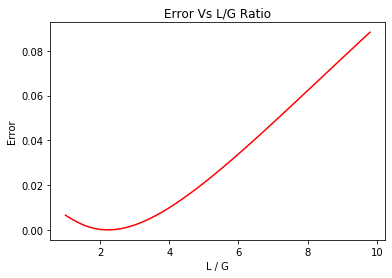

In [8]:
'''Guessing correct L/G ratio in feed'''
y_q = []
x_q = []

sum_q = [] 
for j in np.arange(1,10,0.2):
    sum_q = ((F_Compo["Mole Fraction"] * (1 + j))/(1 + (j/F_Compo["m80"]))).tolist()   
    y_q.append((1-sum(sum_q))**2)
    x_q.append(float(j))
        
plt.plot(x_q,y_q,'r-')
plt.xlabel("L / G")
plt.ylabel("Error")
plt.title("Error Vs L/G Ratio")


In [9]:
'''Calculation of q'''
# L/G Correponding to the y_min look into plot above and write accordingly
LGR = 2.2

# Calculating the amonut of liquid present in the feed
L = B/(1 + (1/LGR))

# Calculating q
q = L/B

In [10]:
'''Calculation of phi'''
y_phi = []
x_phi = []

sum_phi = []

for k in np.arange(F_Compo.loc[HK_id,"alpha80"],F_Compo.loc[LK_id,"alpha80"],0.001):
    sum_phi = ((F_Compo["Mole Fraction"] * F_Compo["alpha80"])/(F_Compo["alpha80"] - k)).tolist()   
    #print(sum(sum_phi))
    y_phi.append((sum(sum_phi) - (1-q))**2)
    x_phi.append(float(k))

Phi = pd.DataFrame(list(zip(y_phi, x_phi)), columns =['Sum of Error', 'Phi']) 

Phi = Phi.sort_values(by ='Sum of Error', ascending = 1) 

Phi

Sum of Error    Phi
411   1.428779e-08  1.411
3749  1.651248e-08  4.749
3750  1.956844e-07  4.750
3748  4.885939e-07  4.748
3751  1.027376e-06  4.751
...            ...    ...
1404  5.568617e+05  2.404
1406  7.182457e+05  2.406
5303  1.404906e+06  6.303
1405  1.572467e+08  2.405
0              inf  1.000

[5304 rows x 2 columns]

In [11]:
'''Caculating the Concentration of the dristribute in the distillate'''
phi1 = 1.411
phi2 = 4.749

# Preparing the list of alpha80
alpha_list = F_Compo.iloc[:LK_id+1, 5].tolist() + F_Compo.iloc[HK_id:, 5].tolist()
alpha_list = np.asarray(alpha_list, dtype = float)

# Preparing the list of alpha80
x_list = F_Compo.iloc[:LK_id+1, 3].tolist() + F_Compo.iloc[HK_id:, 3].tolist()
x_list = np.asarray(x_list, dtype = float)
x_list[LK_id] *= x_lkd 
x_list[HK_id-1] *= x_hkd 

# Column wise mulitplication, division
Product_list = np.multiply(alpha_list, x_list)
Sum_list_1 = np.divide(Product_list,(np.subtract(alpha_list, phi1)))
Sum_list_2 = np.divide(Product_list,(np.subtract(alpha_list, phi2)))

print(Sum_list_1, Sum_list_2)

[ 0.03081791  0.07730239  0.18939231 -0.00729927 -0.05724205] [ 0.03294265  0.1026305   0.59599932 -0.00080021 -0.01273694]


In [12]:
'''Solving the the equations simultaneously using'''

# Summation Vector
Sum_Mat = np.array([[sum(Sum_list_1)],[sum(Sum_list_2)]])

# Creating coefficient matrix
Coeff_Mat = np.array([[1, -1*float(F_Compo.loc[LK_id+1,"alpha80"]/(F_Compo.loc[LK_id+1,"alpha80"] - phi1))],[1, -1*float(F_Compo.loc[LK_id+1,"alpha80"]/(F_Compo.loc[LK_id+1,"alpha80"] - phi2))]])

print(Sum_Mat)
print(Coeff_Mat)

# Solving the equations simultaneously and storing the answer in ans
ans = np.linalg.solve(Coeff_Mat,Sum_Mat)
print(ans)

[[0.2329713 ]
 [0.71803531]]
[[ 1.         -2.41942672]
 [ 1.          1.0260786 ]]
[[0.57358225]
 [0.14078167]]


# Module 3
------------------------------------

In [13]:
'''Creating  a list of distillate composition'''

# Creating a list of distillate composition
yD_List = F_Compo.iloc[:LK_id, 3].tolist() + [x_lkd*F_Compo.iloc[LK_id, 3]] + [ans[1,0]] + [x_hkd*F_Compo.iloc[HK_id, 4]]
print(yD_List)

# Summing all the elements in the list to obtain amount of Distillate
D = sum(yD_List)

print("Amount of Distillate = ", D, " kmoles")

[0.03, 0.07, 0.147, 0.14078167483199622, 0.00395]
Amount of Distillate =  0.3917316748319962  kmoles


In [14]:
'''Creating a DataFrame containing Distillate composition'''

# Creating a Dataframe for the amount of the components in the distillate
D_Compo = F_Compo.iloc[:HK_id+1, 0:2]

# Adding the column of mole fraction
D_Compo["y D"] = pd.DataFrame(yD_List)
D_Compo["y"] = D_Compo["y D"] / D

# Displaying the table
D_Compo

Label Component       y D         y
0  Light non-Key        C1  0.030000  0.076583
1  Light non-Key        C2  0.070000  0.178694
2      Light Key        C3  0.147000  0.375257
3     Distribute        C4  0.140782  0.359383
4      Heavy Key        C5  0.003950  0.010083

In [15]:
'''Creating a DataFrame containing Bottoms Product composition'''

# Creating a Dataframe for the amount of the components in the residue
W_Compo = F_Compo.iloc[LK_id:, 0:2]
W_Compo["x W"] = F_Compo.iloc[LK_id:,3] - D_Compo.iloc[:,2]
W_Compo.loc[5,"x W"] = F_Compo.loc[5,"Mole Fraction"]

# Displaying the table
W_Compo

Label Component       x W
2      Light Key        C3  0.003000
3     Distribute        C4  0.189218
4      Heavy Key        C5  0.296050
5  Heavy non-Key        C6  0.120000

In [16]:
'''Calculating the amount of teh residue'''

# Summation of all the elements of the list gives us bottoms product
W = sum(W_Compo["x W"].tolist())
print("Amount of bottoms product = ", W," kmoles")

# Creating a column of mole fractions of the components in the dataframe
W_Compo["x"] = W_Compo["x W"] / W

W_Compo

Amount of Ditillate =  0.6082683251680038  kmoles


Label Component       x W         x
2      Light Key        C3  0.003000  0.004932
3     Distribute        C4  0.189218  0.311077
4      Heavy Key        C5  0.296050  0.486710
5  Heavy non-Key        C6  0.120000  0.197281

In [17]:
'''Calculation of the important parameters'''

# Calculating minimium reflux ratio
R_m = (ans[0,0] / D) - 1
print("Minimum reflux ratio required = ", R_m)

# Calculation of minimun theoretical plate required
N_m = math.log((D_Compo.loc[2 ,"y"] / D_Compo.loc[4 ,"y"])*((W_Compo.loc[4 ,"x"] / W_Compo.loc[2 ,"x"])))/math.log10(F_Compo.loc[2,"alpha80"]) - 1
print("Minimum number of theoretical plates required = ", N_m)

Minimum reflux ratio required =  0.46422228265420173
Minimum number of theoretical plates required =  9.265895403735977
